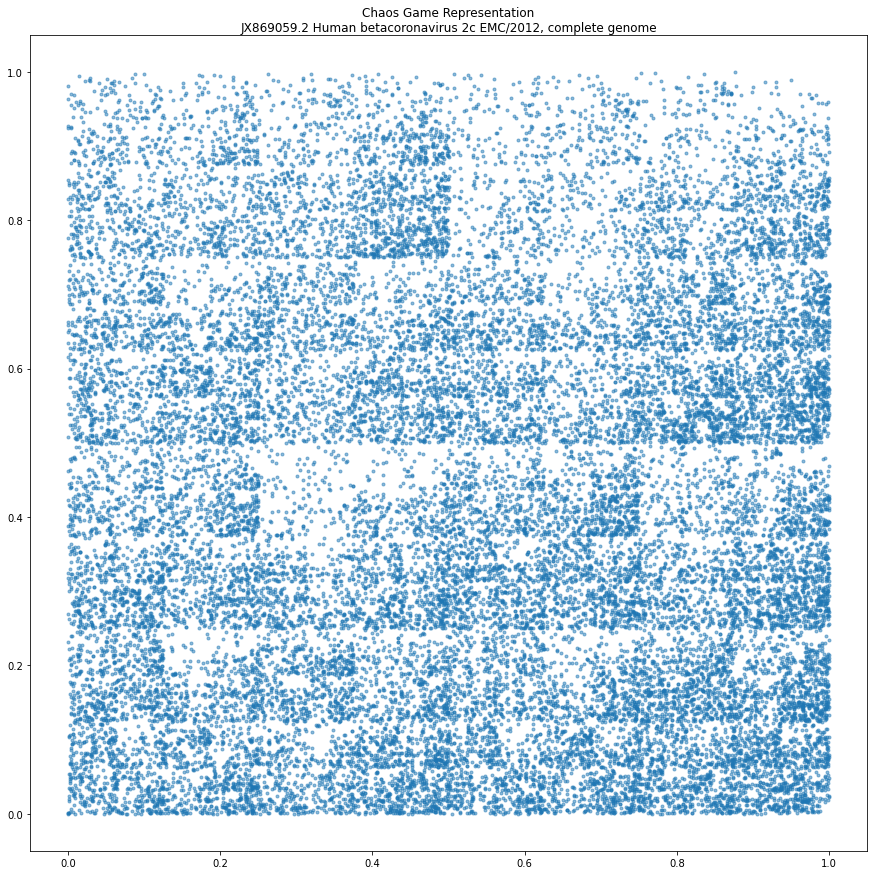

In [8]:
from collections import defaultdict
import matplotlib.pyplot as plt
from Bio import SeqIO
import os
os.chdir('../')
os.chdir(os.getcwd()+'/data')


# defining cgr graph
# CGR_CENTER = (0.5, 0.5)
CGR_X_MAX = 1
CGR_Y_MAX = 1
CGR_X_MIN = 0
CGR_Y_MIN = 0
CGR_A = (CGR_X_MIN, CGR_Y_MIN)
CGR_T = (CGR_X_MAX, CGR_Y_MIN)
CGR_G = (CGR_X_MAX, CGR_Y_MAX)
CGR_C = (CGR_X_MIN, CGR_Y_MAX)
CGR_CENTER = ((CGR_X_MAX - CGR_Y_MIN) / 2, (CGR_Y_MAX - CGR_Y_MIN) / 2)

# Add color code for each element


def empty_dict():
	"""
	None type return vessel for defaultdict
	:return:
	"""
	return None


CGR_DICT = defaultdict(
	empty_dict,
	[
		('A', CGR_A),  # Adenine
		('T', CGR_T),  # Thymine
		('G', CGR_G),  # Guanine
		('C', CGR_C),  # Cytosine
		('U', CGR_T),  # Uracil demethylated form of thymine
		('a', CGR_A),  # Adenine
		('t', CGR_T),  # Thymine
		('g', CGR_G),  # Guanine
		('c', CGR_C),  # Cytosine
		('u', CGR_T)  # Uracil/Thymine
		]
)


def fasta_reader(fasta):
	"""Return a generator with sequence description and sequence
	:param fasta: str filename
	"""
	# TODO: modify it to be capable of reading genebank etc
	flist = SeqIO.parse(fasta,"fasta")
	for i in flist:
		yield i.description, i.seq


def mk_cgr(seq):
	"""Generate cgr
	:param seq: list of nucleotide
	:return cgr: [['nt', (x, y)]] List[List[Tuple(float, float)]]
	"""
	cgr = []
	cgr_marker = CGR_CENTER[:
		]    # The center of square which serves as first marker
	for s in seq:
		cgr_corner = CGR_DICT[s]
		if cgr_corner:
			cgr_marker = (
				(cgr_corner[0] + cgr_marker[0]) / 2,
				(cgr_corner[1] + cgr_marker[1]) / 2
			)
			cgr.append([s, cgr_marker])



	return cgr


def mk_plot(cgr, name, figid):
	"""Plotting the cgr
		:param cgr: [(A, (0.1, 0.1))]
		:param name: str
		:param figid: int
		:return dict: {'fignum': figid, 'title': name, 'fname': helper.slugify(name)}
	"""
	x_axis = [i[1][0] for i in cgr]
	y_axis = [i[1][1] for i in cgr]
	plt.figure(figid)
	plt.title("Chaos Game Representation\n" + name, wrap=True)
	# diagonal and vertical cross
	# plt.plot([x1, x2], [y1, y2])
	# plt.plot([0.5,0.5], [0,1], 'k-')
	#plt.plot([CGR_CENTER[0], CGR_CENTER[0]], [0, CGR_Y_MAX], 'k-')

	# plt.plot([0,1], [0.5,0.5], 'k-')
	#plt.plot([CGR_Y_MIN, CGR_X_MAX], [CGR_CENTER[1], CGR_CENTER[1]], 'k-')
	plt.scatter(x_axis, y_axis, alpha=0.5, marker='.')

	return {'fignum': figid, 'title': name}



if __name__ == '__main__':
	fig_id = 1
	my_plots = []    # new plot
	mycgr = []    # hold new cgrs; pointless for now
	fasta_seq = fasta_reader('seq_1.fasta')
	plt.figure(figsize=(15,15))   
	for name, seq in fasta_seq:
		cgr = mk_cgr(seq)
			# TODO:Add facility to write cgr to file
		my_plots.append(mk_plot(cgr, name, fig_id))

	plt.show()